In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
count,987.0,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.0,493.000000,13.874367,0.636272,-71.529889,0.191272,0.184439
std,0.0,285.066659,16.694196,1.026239,205.082455,0.234812,0.220709
min,0.0,0.000000,3.000000,0.000000,-200.000000,0.010000,0.024041
25%,0.0,246.500000,3.000000,0.000000,-200.000000,0.023329,0.043146
50%,0.0,493.000000,7.000000,0.000000,-200.000000,0.080261,0.100714
75%,0.0,739.500000,18.000000,1.000000,0.000000,0.276130,0.236409
max,0.0,986.000000,155.000000,6.000000,1000.000000,0.950000,1.791847


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration


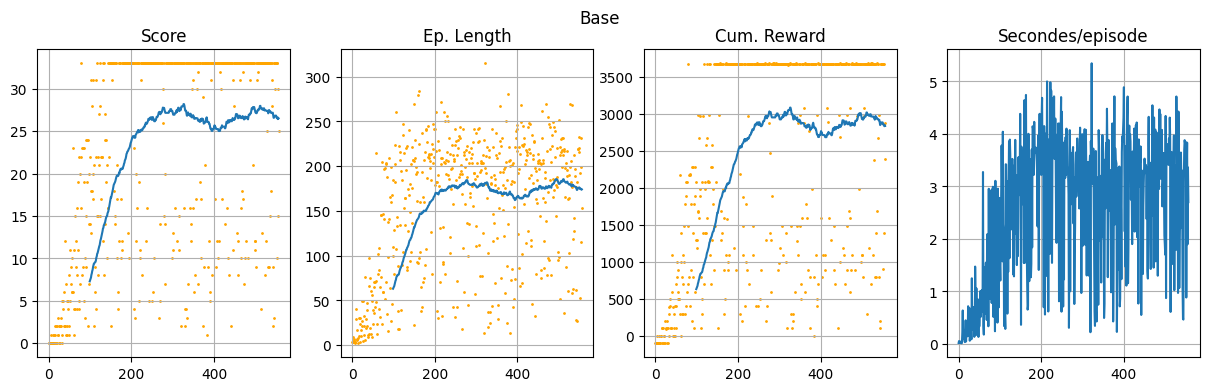

Total time: 1440.02
Max Score: 33 a 79
Max Cum. Reward: 3689.1 a 536
Max Ep. Length: 315 a 322


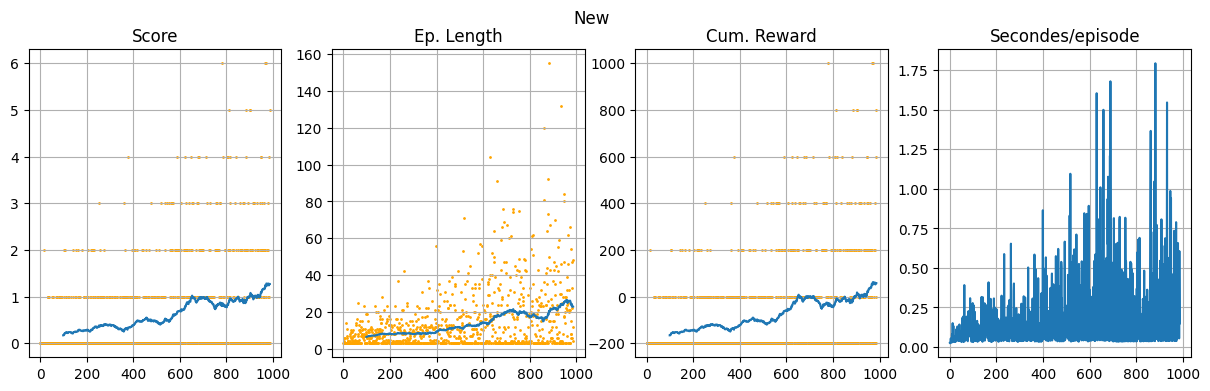

Total time: 182.04
Max Score: 6 a 780
Max Cum. Reward: 1000.0 a 780
Max Ep. Length: 155 a 882


In [9]:
def graph(df, title, ROLLING=100):
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.plot(df.Episode, df.Score.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.Score, s=1, color="orange")
    plt.title("Score")
    plt.grid()

    plt.subplot(142)
    plt.plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    plt.title("Ep. Length")
    plt.grid()

    plt.subplot(143)
    if False:
        plt.plot(df.Episode, df.Epsilon)
        plt.title("Epsilon")
    else:
        plt.plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
        plt.scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
        plt.title("Cum. Reward")
    plt.grid()

    plt.subplot(144)
    plt.plot(df.Episode, df.EpisodeDuration)
    plt.title("Secondes/episode")
    plt.grid()

    plt.suptitle(title)
    plt.show()

    runtime = df.EpisodeDuration.sum()
    print("Total time:", round(runtime, 2))
    print("Max Score:", df.Score.max(), "a", df.Score.argmax())
    print("Max Cum. Reward:", df.CumulativeReward.max().round(3), "a", df.CumulativeReward.argmax())
    print("Max Ep. Length:", df.EpisodeLength.max(), "a", df.EpisodeLength.argmax())

graph(df_base, "Base")
graph(df, "New")